<a href="https://colab.research.google.com/github/Shubhangani-Tiwari/Supervised-M.L-Project--Transport-Demand-Prediction/blob/main/Niarobi_Transport_Demand_prdiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project Name - Transport Demand Prediction**

 **Project Type - Regression**

**Contribution - Individual** (Shubhangani Tiwari)

transportation-logistics-container-cargo-ship-cargo-plane_37416-150.avif

## **Project Summary-**

To immence this project Nairobi-Transport-Demand-Prediction dataset was provided to us. Earlier it was in unformatted manner,which included some uneven data, and duplicate data and also some data columns were irrelevant. For doing the analysis on the data, a well structured data is needed.

As I read the data present in the file and gone through the details in each and every column. The data set was huge in which some of the data was not required for the analysis so the data has been cleaned by dropping some unwanted columns and obtained the target variable "number of tickit", this is got from ride id. then created a new data frame, with the columns we required for the analysis including target variable.

I used feature engineering to get useful columns out of irrelevent column. Each and every column were compared to gain the insights about the data by doing the exploratory data analysis using python and also saw the distribution of target variable. Cleaning the dataset, statistically analysing the data and visualizing the data by plotting the data into different graph and charts so that the trend and relationship between the various indicators can be understand easily, Modelling and Predicting the model using Machine learning algorithms.

To preform linear regression, we have to fulfil the assumptions of it so I have used Variance inflation factor(VIF) and heatmap to have an idea about  multicollinearity in the dataset, I remove the features which were having high multicollinearity and acquire the best features for regression. Perform train test split, feature scaling by zscore. I used different types of regression algorithm to train our model like, Linear Regression, Regularized linear regression (Ridge and Lasso), and used all the feature without checking multicollinearity to train our model like, Decision tree regressor, Random Forest regressor, and XGboost regresssor and Also I tuned the parameters of Regularized linear regression (Ridge and Lasso), Random Forest regressor and XGboost regressor and also found the important features for training the model.

Out of them XGboost with tuned hyperparameters gave the best result.

This resulting model can be used by Mobiticket and bus operators to anticipate customer demand for certain rides, to manage resources and vehicles more efficiently, to offer promotions and sell other services more effectively, such as microinsurance, or even improve customer service by being able to send alerts and other useful information to customers.

## **GitHub Link -**

https://github.com/Shubhangani-Tiwari/Supervised-M.L-Project--Transport-Demand-Prediction

## **Problem Statement**

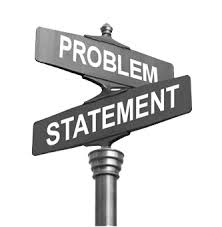

This challenge asks me to build a model that predicts the number of seats that Mobiticket can expect to sell for each ride, i.e. for a specific route on a specific date and time. There are 17 routes in this dataset. All of the routes end in Nairobi and originate in towns to the North-West of Nairobi towards Lake Victoria.

The towns from which these routes originate are:

1.Awendo

2.Homa Bay

3.Kehancha

4.Kendu Bay

5.Keroka

6.Keumbu

7.Kijauri

8.Kisii

9.Mbita

10.Migori

11.Ndhiwa

12.Nyachenge

13.Oyugis

14.Rodi

15.Rongo

16.Sirare

17.Sori

The routes from these 17 origins to the first stop in the outskirts of Nairobi takes approximately 8 to 9 hours from time of departure. From the first stop in the outskirts of Nairobi into the main bus terminal, where most passengers get off, in Central Business District, takes another 2 to 3 hours depending on traffic.

The three stops that all these routes make in Nairobi (in order) are:

1.Kawangware: the first stop in the outskirts of Nairobi

2.Westlands

3.Afya Centre: the main bus terminal where most passengers disembark

All of these points are mapped here.
Passengers of these bus (or shuttle) rides are affected by Nairobi traffic not only during their ride into the city, but from there they must continue their journey to their final destination in Nairobi wherever that may be. Traffic can act as a deterrent for those who have the option to avoid buses that arrive in Nairobi during peak traffic hours. On the other hand, traffic may be an indication for people’s movement patterns, reflecting business hours, cultural events, political events, and holidays.


# **Data Description**

Nairobi Transport Data.csv (zipped) is the dataset of tickets purchased from Mobiticket for the 17 routes from “up country” into Nairobi between 17 October 2017 and 20 April 2018. This dataset includes the variables: ride_id, seat_number, payment_method, payment_receipt, travel_date, travel_time, travel_from, travel_to, car_type, max_capacity.

Uber Movement traffic data can be accessed here.

https://drive.google.com/drive/folders/1RhQK3OuurdDXt4EqO6i5XMV7VeitvwsA

 Data is available for Nairobi through June 2018. Uber Movement provided historic hourly travel time between any two points in Nairobi. Any tables that are extracted from the Uber Movement platform can be used in your model.

# **Variables Description**

ride_id: unique ID of a vehicle on a specific route on a specific day and time.

seat_number: seat assigned to ticket

payment_method: method used by customer to purchase ticket from Mobiticket (cash or Mpesa)

payment_receipt: unique id number for ticket purchased from Mobiticket

travel_date: date of ride departure. (MM/DD/YYYY)

travel_time: scheduled departure time of ride. Rides generally depart on time. (hh:mm)

travel_from: town from which ride originated

travel_to: destination of ride. All rides are to Nairobi.

car_type: vehicle type (shuttle or bus)


max_capacity: number of seats on the vehicle




## **Let's begin**

In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
#mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pd.options.display.max_columns = 100

In [ ]:
#Read the dataset
df=pd.read_csv('/content/drive/MyDrive/Nairobi Transport Data.zip')
df

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49
...,...,...,...,...,...,...,...,...,...,...
51640,13826,9B,Mpesa,8V2XDDZR6V,20-04-18,8:00,Awendo,Nairobi,Bus,49
51641,13809,18A,Mpesa,4PEBSVJSNK,20-04-18,8:00,Migori,Nairobi,Bus,49
51642,13809,17A,Mpesa,LVN64LZDNN,20-04-18,8:00,Migori,Nairobi,Bus,49
51643,13796,16B,Mpesa,REYBSKTYWN,20-04-18,7:08,Awendo,Nairobi,Bus,49


In [ ]:
#first 5 values
df.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


In [ ]:
#last 5 values
df.tail()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
51640,13826,9B,Mpesa,8V2XDDZR6V,20-04-18,8:00,Awendo,Nairobi,Bus,49
51641,13809,18A,Mpesa,4PEBSVJSNK,20-04-18,8:00,Migori,Nairobi,Bus,49
51642,13809,17A,Mpesa,LVN64LZDNN,20-04-18,8:00,Migori,Nairobi,Bus,49
51643,13796,16B,Mpesa,REYBSKTYWN,20-04-18,7:08,Awendo,Nairobi,Bus,49
51644,14304,7,Mpesa,AQN7FBUSGP,14-11-17,5:10,Kisii,Nairobi,Bus,49


# **Understanding the data**

In [ ]:
#Shape
df.shape

(51645, 10)

In [ ]:
#information about null values and datatype for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ride_id          51645 non-null  int64 
 1   seat_number      51645 non-null  object
 2   payment_method   51645 non-null  object
 3   payment_receipt  51645 non-null  object
 4   travel_date      51645 non-null  object
 5   travel_time      51645 non-null  object
 6   travel_from      51645 non-null  object
 7   travel_to        51645 non-null  object
 8   car_type         51645 non-null  object
 9   max_capacity     51645 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 3.9+ MB


In [ ]:
#information about null values
df.isnull().sum()

ride_id            0
seat_number        0
payment_method     0
payment_receipt    0
travel_date        0
travel_time        0
travel_from        0
travel_to          0
car_type           0
max_capacity       0
dtype: int64

In [ ]:
#change datatype of ride_id and max_capacity from int to object because it is also a nominal categorial data and we want their categorical description.
df[["ride_id","max_capacity"]]=df[["ride_id","max_capacity"]].astype(str)
     

In [ ]:
#categorical description
df.describe(include='object')


,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
count,51645,51645,51645,51645,51645,51645,51645,51645,51645,51645
unique,6249,61,2,51645,149,78,17,1,2,2
top,8454,1,Mpesa,UZUEHCBUSO,10-12-17,7:09,Kisii,Nairobi,Bus,49
freq,50,2065,51532,1,856,3926,22607,51645,31985,31985


# **Summary:-**

In Ride_id, there are 6249 unique values.

There are total 61 unique seat numbers in this dataset.

Travelers have used 2 types of payment methods and most of the people(i.e. 51532 out of 51645) have used Mpesa to pay for their ticket.

The record of 149 days is present in this dataset.

In travel_time, there are 78 unique time.

There are 17 towns where rides are originated and 22607 rides are only originated from Kisii.

There are 2 type of cars and most of them(31985 out of 51645) are bus.

There are 2 Maximum seat capacity and most of them have 49 seat capacity and frequency of 49 seat capacity is equal to frequency of bus, Thus we say that Bus have 49 seat capacity.

In [ ]:
#get all the column names of the dataset
columns=df.columns
columns

Index(['ride_id', 'seat_number', 'payment_method', 'payment_receipt',
       'travel_date', 'travel_time', 'travel_from', 'travel_to', 'car_type',
       'max_capacity'],
      dtype='object')

In [ ]:
#finding the relation between car_type and max_capacity
df.groupby(['car_type','max_capacity'])['max_capacity'].count().unstack()

max_capacity,11,49
car_type,,
Bus,NaN,31985.0
shuttle,19660.0,NaN


We conclude that bus has seat capacity of 49 and shuttle has seat capacity of 11.

In [ ]:
#finding the relation between car_type and travel_from
df.groupby(['travel_from','car_type'])['car_type'].count().unstack()

car_type,Bus,shuttle
travel_from,,
Awendo,1788.0,NaN
Homa Bay,6304.0,NaN
Kehancha,1909.0,NaN
Kendu Bay,1.0,NaN
Keroka,341.0,647.0
Keumbu,3.0,19.0
Kijauri,408.0,623.0
Kisii,4236.0,18371.0
Mbita,378.0,NaN


as we see that, Shuttle only used for travel from Keroka, Keumbu, Kijauri and Kisii town, whereas bus is used for travel from all the town.

In [ ]:
df['travel_from'].unique()

array(['Migori', 'Keroka', 'Homa Bay', 'Kisii', 'Keumbu', 'Rongo',
       'Kijauri', 'Oyugis', 'Awendo', 'Sirare', 'Nyachenge', 'Kehancha',
       'Kendu Bay', 'Sori', 'Rodi', 'Mbita', 'Ndhiwa'], dtype=object)

## **Finding Our Target Variable**

In [ ]:
df['ride_id'].value_counts()

8454     50
13211    49
10834    49
8090     49
11382    49
         ..
10090     1
10091     1
10114     1
10116     1
14304     1
Name: ride_id, Length: 6249, dtype: int64

Since there are total 61645 rows i.e 61645 bookings but only 6249 unique ride_id. This implies that there are more than one seats have booked by single ride_id.

So in order to find the total seat_booking we need to count the different seat numbers corresponding to  single ride_id.

In [ ]:
df.groupby(['ride_id']).seat_number.count()

ride_id
10002    1
10003    7
10004    1
10005    1
10006    9
        ..
9988     3
9989     3
9990     1
9997     1
9999     1
Name: seat_number, Length: 6249, dtype: int64

In [ ]:
totl_tickit=df.groupby(['ride_id']).seat_number.count().sort_values(ascending=False).rename("number_of_tickit").reset_index()
totl_tickit.head()

,ride_id,number_of_tickit
0,8454,50
1,10834,49
2,8090,49
3,11382,49
4,13211,49


As we have found our target variable therefore let's delete the duplicate values from ride_id.

In [ ]:
#Drop duplicates
df=df.drop_duplicates('ride_id')

In [ ]:
#shape of new dataset after dropping duplicates
df.shape

(6249, 10)

In [ ]:
#merge target variable and independent variable on the basis of ride_id
df =df.merge(totl_tickit,on= 'ride_id')
df.head(10)

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_tickit
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49,1
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49,1
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49,1
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49,5
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49,31
5,5781,22A,Mpesa,VGG7Q3MVJX,27-11-17,7:09,Homa Bay,Nairobi,Bus,49,26
6,5784,1X,Mpesa,3OPU23FHRB,20-04-18,5:10,Kisii,Nairobi,shuttle,11,1
7,5789,1X,Mpesa,BPRX4UMFFN,20-04-18,9:50,Kisii,Nairobi,shuttle,11,1
8,5790,1B,Mpesa,DC8ABRSXXK,20-04-18,7:06,Kisii,Nairobi,Bus,49,2
9,5791,1,Mpesa,HGQURN0SZS,20-04-18,6:00,Kisii,Nairobi,shuttle,11,1


# **UNIVARIATE ANALYSIS**

In [ ]:
# parameters for pie chart.
traffic_from = df['travel_from'].value_counts().index
traffic_from_val = df['travel_from'].value_counts().values

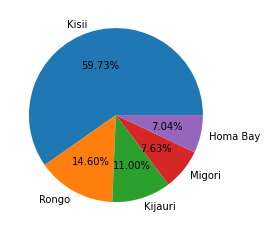

In [ ]:
# top 5 places where most people are comming.

plt.pie(traffic_from_val[:5], labels=traffic_from[:5], autopct='%1.2f%%')
plt.show()

# **Observation:** 
Most of the people are travelling from Kisii 59.73%, followed by Rango 14.60%, kijauri 11%, Migori 7.63% and Homa Bay 7.04% etc.

In [ ]:
#function for plotting countplot with values on their top.
def countplot_values(feature):
  y=df[feature].value_counts().reset_index()[feature]
  #barplot 
  plt.figure(figsize=(10,10))
  df[feature].value_counts().plot(kind='barh',color="green")
  for index, value in enumerate(y):
    plt.text(value, index, str(value))
  plt.show()
  return feature

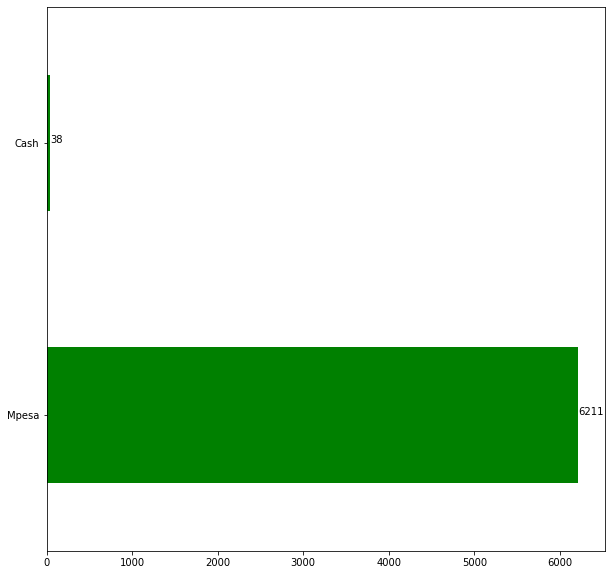

'payment_method'

In [ ]:
countplot_values('payment_method')

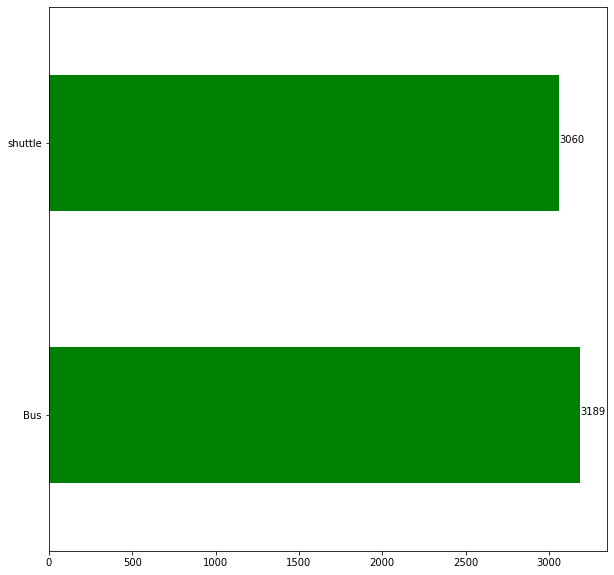

'car_type'

In [ ]:
countplot_values("car_type")

Mostly people travel by a bus (i.e. with maximum capacity 49) as compare to shuttle (whose maximum capacity is 11).

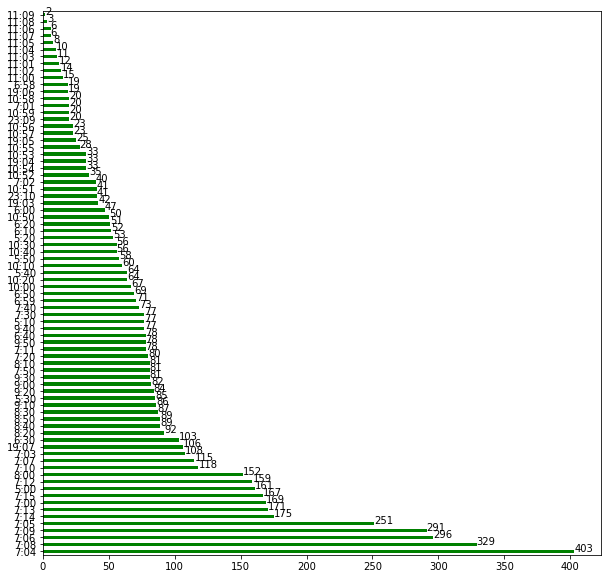

'travel_time'

In [ ]:
countplot_values('travel_time')

Most prefer time for travel to Nairobi is 7:04 A.M., 7:08 A.M. and 7:06 A.M. because most vehicle are began at 7:04 A.M., 7:08 A.M. and 7:06 A.M. for travel to Nairobi.

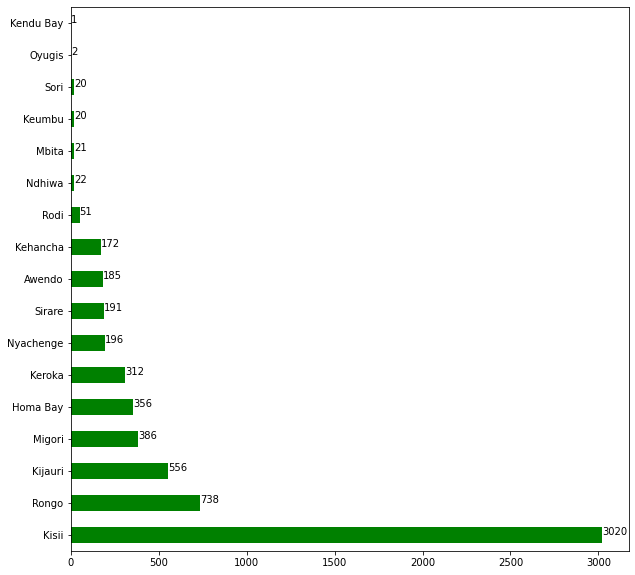

'travel_from'

In [ ]:
countplot_values('travel_from')

Mostly vehicle are originated from Kisii, Rongo and Kijauri.

# **Summary**

From all of these plot, as we saw that,

* By Bus, Number of ticket 1 is most frequent with value 699.

* By shuttle, Number of ticket 1 and 11 are most frequent with values 759 and 
748 respectively.

* Mpesa is used mostly in Payment mode type, i.e., cash is less prefered by the people who travel to Nairobi.

* Mostly people travel by a bus (i.e. with maximum capacity 49) as compare to shuttle (whose maximum capacity is 11).

* Mostly vehicle are originated from Kisii, Rongo and Kijauri.

* Most prefer time for travel to Nairobi is 7:04 A.M., 7:08 A.M. and 7:06 A.M.

Since we have found our final dataset so let us remove some features that doesn't seem to be important for predicting the number of tickets in our model.


In [ ]:
#remove ineffectual and constant columns
df.drop(['seat_number','payment_receipt','payment_method','travel_to'],axis=1,inplace= True)

#travel_to is a constant feature since it takes only one value i.e Nairobi

In [ ]:
# This is to supress the warning messages (if any) generated in our code
import warnings
warnings.filterwarnings('ignore')

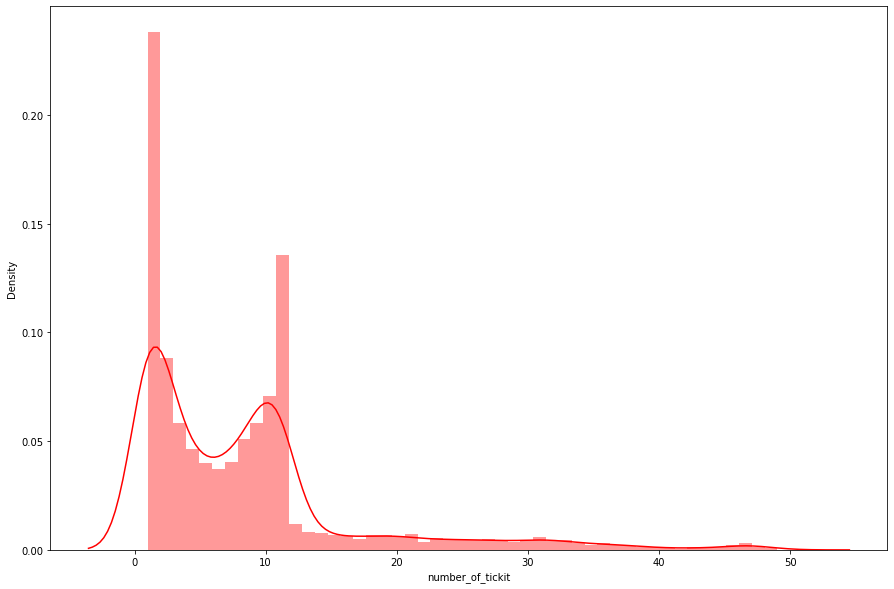

In [ ]:
#Let's check the distribution of dependent variable (number_of_tickit)
plt.figure(figsize=(15,10))
sns.distplot(df['number_of_tickit'],color='r')

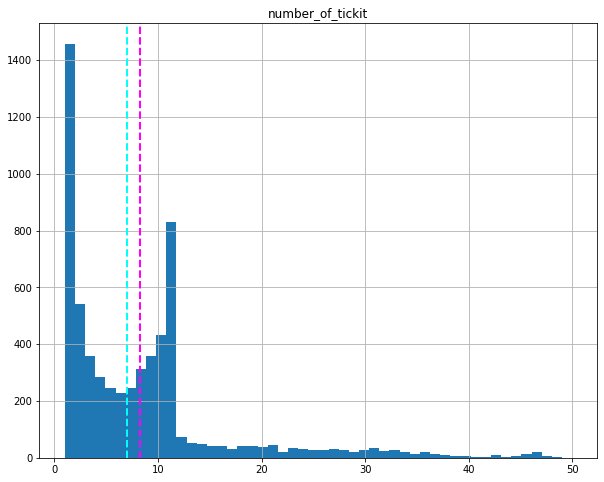

In [ ]:
#histogram for target variable
fig=plt.figure(figsize=(10,8))
ax= fig.gca()
df['number_of_tickit'].hist(bins=50,ax=ax)
ax.axvline(df['number_of_tickit'].mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(df['number_of_tickit'].median(), color='cyan', linestyle='dashed', linewidth=2)    
ax.set_title('number_of_tickit')
plt.show()
     

Summary:
As we know that, positive skewed, negative skewed and no skewed in the data is determined by mean, median amd mode.

if mean > median > mode then, distribution of the data is positively skewed,

if mean = median = mode then, no skewed that is normally distributed,

otherwise, it is negatively skewed.

Since here mean>median hence we say that num_of_tickit is positively distributed.

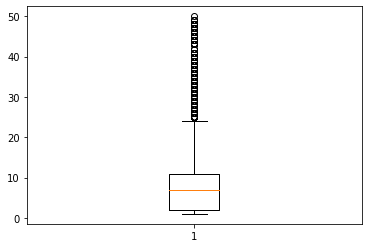

In [ ]:
#Boxplot to get an idea about the outliers in our target variable.
plt.boxplot(df['number_of_tickit'])
plt.show()

In [ ]:
# creating dataframe to analyse Routes.
routes_tickets = df.groupby(['travel_from'])['number_of_tickit'].sum().reset_index()
routes_tickets

,travel_from,number_of_tickit
0,Awendo,1788
1,Homa Bay,6304
2,Kehancha,1909
3,Kendu Bay,1
4,Keroka,988
5,Keumbu,22
6,Kijauri,1031
7,Kisii,22607
8,Mbita,378
9,Migori,7027


In the above plot we can see the Total number of ticket sold for each Routes.

we can see that Kisii has most number of tickets sold.

# **Feature Engineering**

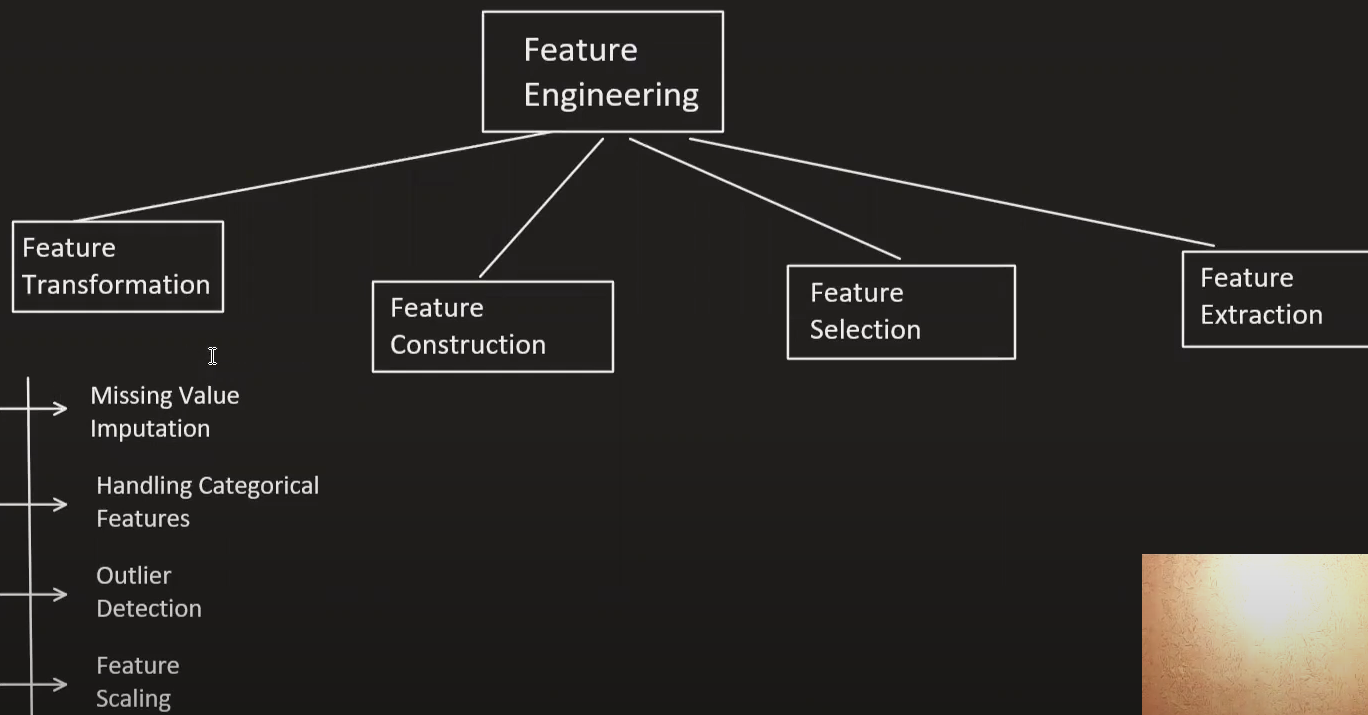

In [ ]:
travel_date=pd.to_datetime(df["travel_date"],dayfirst=True).astype("str")

In [ ]:
#combine travel date and travel time column and make a new feature called date.
df["date"]= travel_date+ " "+df["travel_time"]
df["date"]

0        2017-10-17 7:15
1        2017-11-19 7:12
2        2017-11-26 7:05
3        2017-11-27 7:10
4        2017-11-27 7:12
              ...       
6244    2018-04-20 23:10
6245     2018-04-20 7:05
6246     2018-04-20 7:09
6247     2018-04-20 8:00
6248     2017-11-14 5:10
Name: date, Length: 6249, dtype: object

In [ ]:
#define a function based on time features
def  time_features(df1): 

  '''This function takes dataframe as an argument and extracts the
  different features from the date variable of the dataset and finaly returns the updated 
  dataset'''
  
  df1["date"]=pd.to_datetime(df1["date"])
  df1["day_of_week"]=df1["date"].dt.dayofweek
  df1["day_of_year"]=df1["date"].dt.dayofyear
  df1["day_of_month"]=df1["date"].dt.day
  df1["year_woy"]=df1["date"].dt.year.astype(str)+df1["date"].dt.weekofyear.astype(str)
  df1["hour"]=df1["date"].dt.hour
  df1["minute"]=df1["date"].dt.minute
  df1["is_weekend"]=df1["day_of_week"].apply( lambda x : 1 if x  in [6,7] else 0 )
  df1["year"]=df1["date"].dt.year
  df1["quarter"]=df1["date"].dt.quarter
  df1["month"]=df1["date"].dt.month
  return df1

In [ ]:
#call the function
df_new = time_features(df)
df_new.shape

(6249, 18)

In [ ]:
#new dataframw with addition of time features
df_new.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_tickit,date,day_of_week,day_of_year,day_of_month,year_woy,hour,minute,is_weekend,year,quarter,month
0,1442,17-10-17,7:15,Migori,Bus,49,1,2017-10-17 07:15:00,1,290,17,201742,7,15,0,2017,4,10
1,5437,19-11-17,7:12,Migori,Bus,49,1,2017-11-19 07:12:00,6,323,19,201746,7,12,1,2017,4,11
2,5710,26-11-17,7:05,Keroka,Bus,49,1,2017-11-26 07:05:00,6,330,26,201747,7,5,1,2017,4,11
3,5777,27-11-17,7:10,Homa Bay,Bus,49,5,2017-11-27 07:10:00,0,331,27,201748,7,10,0,2017,4,11
4,5778,27-11-17,7:12,Migori,Bus,49,31,2017-11-27 07:12:00,0,331,27,201748,7,12,0,2017,4,11


In [ ]:
#for particular car type
df_bus=df_new[df_new["car_type"]=="Bus"]
df_shuttle=df_new[df_new["car_type"]=="shuttle"]
     

In [ ]:
#tuple
dfs=(df_bus,df_shuttle)
     

In [ ]:
#car_type value
df_new["car_type"].unique()

array(['Bus', 'shuttle'], dtype=object)

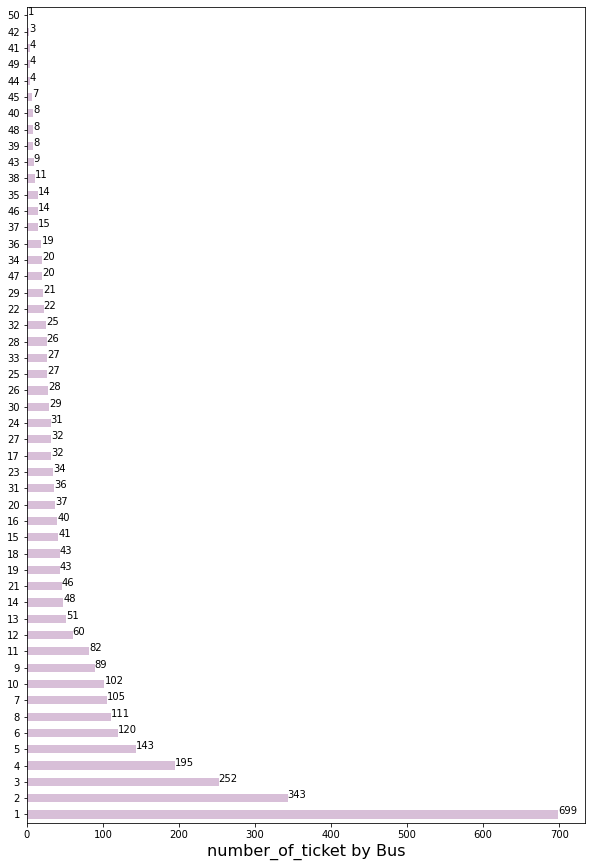

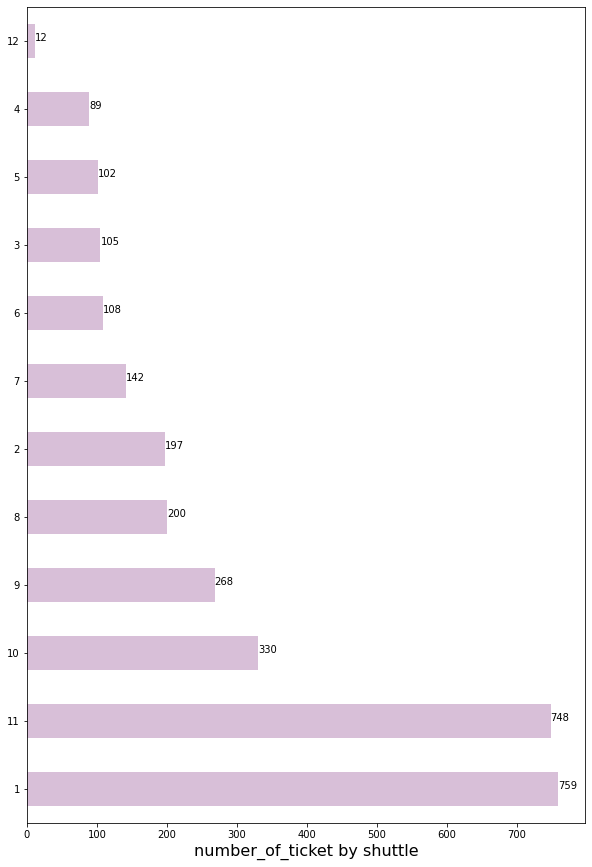

In [ ]:
#countplot for both number of ticket when travel is done by bus and by shuttle
for d,car in zip(dfs,df_new["car_type"].unique()):
  y=d["number_of_tickit"].value_counts().reset_index()["number_of_tickit"]
  #barplot 
  plt.figure(figsize=(10,10))
  d["number_of_tickit"].value_counts().plot(kind='barh',color="thistle",figsize=(10,15))
  for index, value in enumerate(y):
    plt.text(value, index, str(value))
  plt.xlabel("number_of_ticket by " + car, fontsize=16)
  plt.show()

## **Summary:**

By Bus, Number of ticket 1 is most frequent with value 699.

By shuttle, Number of ticket 1 and 11 are most frequent with values 759 and 748 respectively.

In [ ]:
#let's check for a particular number of ticket 50 which has frequency 1 i.e., 50 people are travel from the particular vehicle on a specific route on a specific day and time.

df_new[df_new["number_of_tickit"]==50] 

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_tickit,date,day_of_week,day_of_year,day_of_month,year_woy,hour,minute,is_weekend,year,quarter,month
1924,8454,09-01-18,7:00,Sirare,Bus,49,50,2018-01-09 07:00:00,1,9,9,20182,7,0,0,2018,1,1


Highest number of tickets is 50, in bus to travel from Sirare to Nairobi at 7:00 A.M. on 09-01-18 .

In [ ]:
len(df_new[(df_new["number_of_tickit"]>10) & (df_new["car_type"]=="shuttle")])/len(df_new[df_new["car_type"]=="shuttle"])
     

0.24836601307189543

We conclude that 25% of shuttles were utilize their full capacity(i.e 11 seats)

In [ ]:
last_date=df_new["date"].max()
first_date=df_new["date"].min()
print(f"dataset have data between {first_date} and {last_date}")

dataset have data between 2017-10-17 07:15:00 and 2018-04-20 23:10:00


year


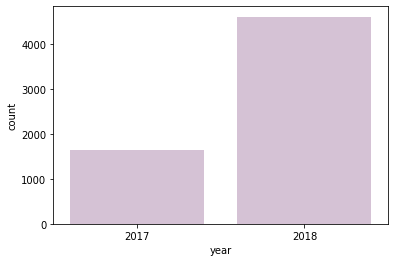

month


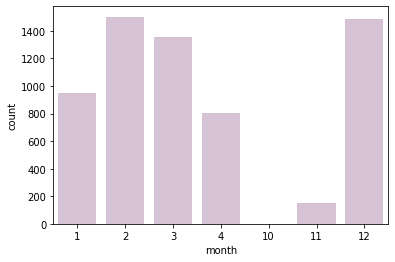

quarter


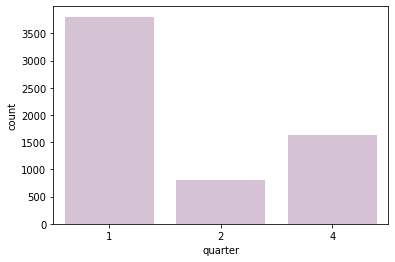

In [ ]:
#countplot for year,month and quarters.
count_clms=["year","month","quarter"]
for feature in count_clms:
   print(feature)
   sns.countplot(df_new[feature],color='thistle')
   plt.show()
 


# **Summary**

From all of these plot, as we saw that:

This dataset contains data of 2 year (i.e. 2017 and 2018).

we conclude that maximum vehicles are used in quarter 1.

we conclude that maximum vehicles are used in month 12, 2 and 1(means in summer season of nairobi).

# **BIVARIATE ANALYSIS**


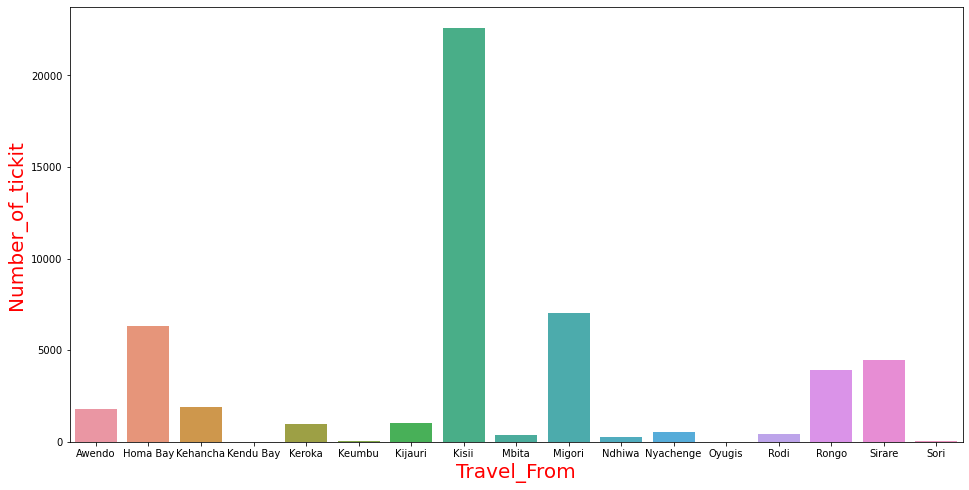

In [ ]:
plt.figure(figsize=(16,8))
sp=sns.barplot(x='travel_from',y='number_of_tickit',data=routes_tickets)
plt.xlabel('Travel_From',color='r',fontsize=20)
plt.ylabel('Number_of_tickit',color='r',fontsize=20)
plt.show()

In [ ]:
categorical_features=['travel_from','car_type']

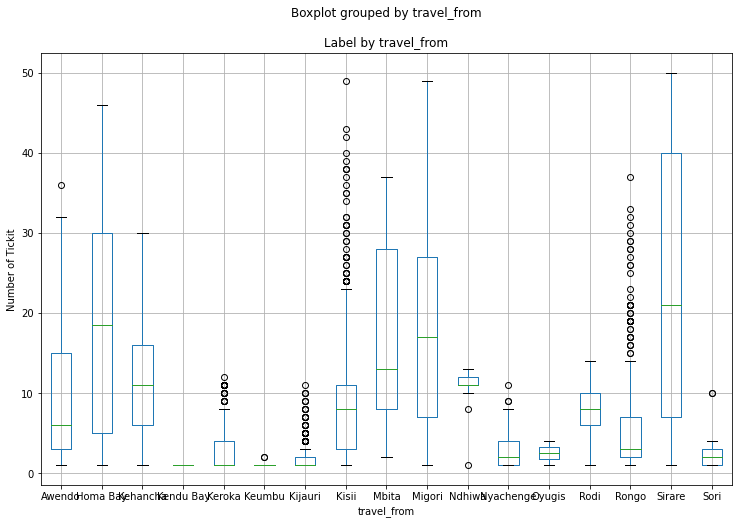

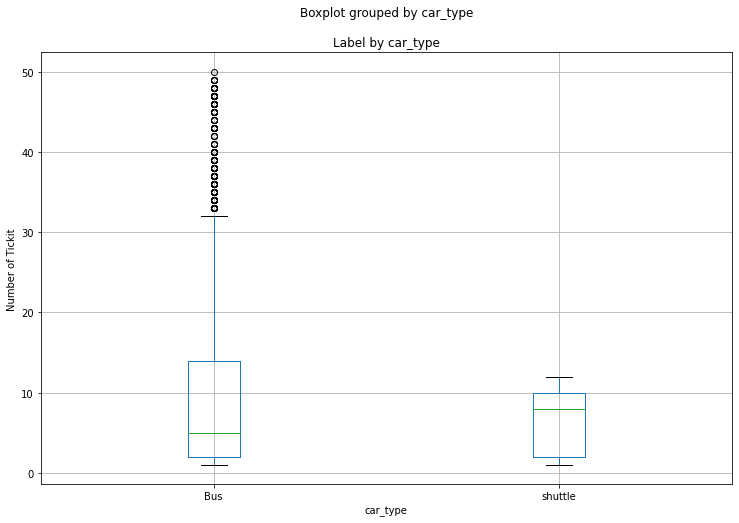

In [ ]:
# plot a boxplot for the label by each categorical feature  

for col in categorical_features:
    fig = plt.figure(figsize=(12, 8))
    ax = fig.gca()
    df_new.boxplot(column = 'number_of_tickit', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Number of Tickit")
plt.show()

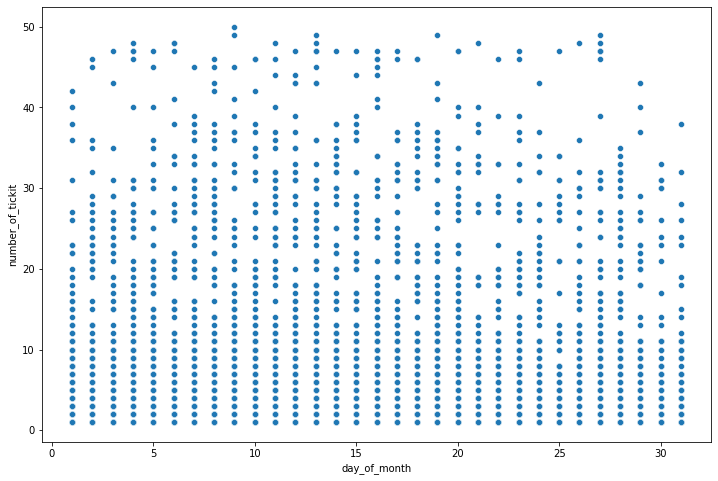

In [ ]:
#scatter plot to understand day of month relation with number of tickets.
plt.figure(figsize=(12,8))
sns.scatterplot(x=df_new['day_of_month'],y= df_new['number_of_tickit'])
plt.show()

# **Observation**

From the above scatter plot we can  say that the number of tickets from 1 to 10 in each days of month are almost same. but for number of tickets > 10 in all the days of month, there is some variation.



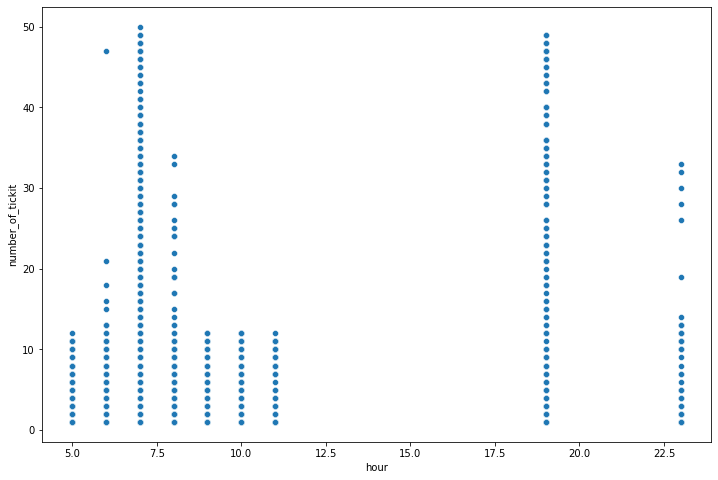

In [ ]:
#scatter plot to understand hour relation with number of tickets.
plt.rcParams['figure.figsize']= (12,8)
sns.scatterplot(x=df_new['hour'],y= df_new['number_of_tickit'])
plt.show()

## **Observation:**

We can see that most of the ticktes were sold at 7 AM and 8 PM. And that seems true because in the morning most of the people go to the work and office.

From the above we can say that there is no ride between 12pm to 5.30Pm

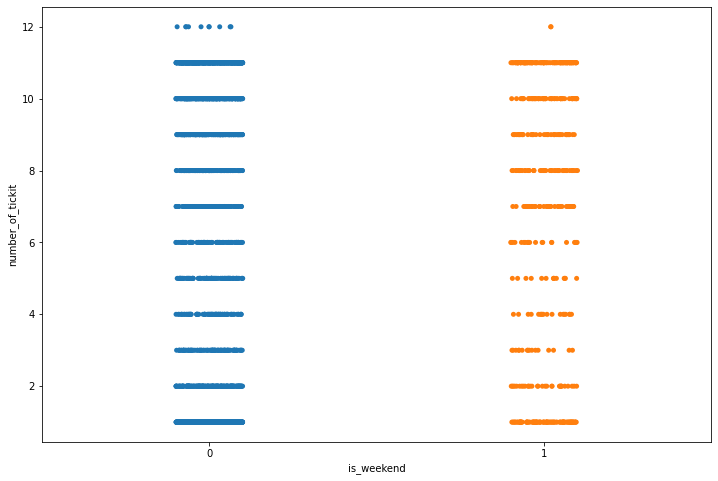

In [ ]:
#Strip plot to see the relationship between weekend and number of tickit
sns.stripplot(x='is_weekend', y="number_of_tickit", data=d)
plt.show()

Summary:

Since, comparison between weekdays and weekends demand is unfair for this data, because weekdays are 5 and weekends are only 2.

Thus, from the above plot, I conclude that there is no such difference in demand. 



## **Let's add distance and time taken column in our dataset using Google Maps**

In [ ]:
#calculating distance between two points using google maps.
distance = {'Migori': 370 , 'Keroka': 280, 'Homa Bay':360, 'Kisii':305.1, 'Keumbu':295, 'Rongo':332,
'Kijauri':271, 'Oyugis':330.6, 'Awendo':351, 'Sirare':392, 'Nyachenge':326, 'Kehancha': 387.7,
'Kendu Bay':347, 'Sori':399, 'Rodi':348, 'Mbita':401, 'Ndhiwa': 371}
df_new["distance"]=df_new.travel_from.map(distance)

In [ ]:
#calculating travel time between two points using google maps.
#  7*60 is converting hours into minutes.
time = {'Migori': 7*60+8 , 'Keroka': 5*60, 'Homa Bay':7*60, 'Kisii':5*60+34, 'Keumbu':5*60+20, 'Rongo':6*60+21,
'Kijauri':60*4+50,'Oyugis':5*60+50, 'Awendo':6*60+38, 'Sirare':7*60+30, 'Nyachenge':6*60+10, 'Kehancha':7*60+10,
'Kendu Bay':6*60+10, 'Sori':7*60+30, 'Rodi':6*60+40, 'Mbita':7*60+23, 'Ndhiwa': 7*60}
df_new["time_taken"]=df_new.travel_from.map(time)

In [ ]:
df_new.head(10)

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_tickit,date,day_of_week,day_of_year,day_of_month,year_woy,hour,minute,is_weekend,year,quarter,month,distance,time_taken
0,1442,17-10-17,7:15,Migori,Bus,49,1,2017-10-17 07:15:00,1,290,17,201742,7,15,0,2017,4,10,370.0,428
1,5437,19-11-17,7:12,Migori,Bus,49,1,2017-11-19 07:12:00,6,323,19,201746,7,12,1,2017,4,11,370.0,428
2,5710,26-11-17,7:05,Keroka,Bus,49,1,2017-11-26 07:05:00,6,330,26,201747,7,5,1,2017,4,11,280.0,300
3,5777,27-11-17,7:10,Homa Bay,Bus,49,5,2017-11-27 07:10:00,0,331,27,201748,7,10,0,2017,4,11,360.0,420
4,5778,27-11-17,7:12,Migori,Bus,49,31,2017-11-27 07:12:00,0,331,27,201748,7,12,0,2017,4,11,370.0,428
5,5781,27-11-17,7:09,Homa Bay,Bus,49,26,2017-11-27 07:09:00,0,331,27,201748,7,9,0,2017,4,11,360.0,420
6,5784,20-04-18,5:10,Kisii,shuttle,11,1,2018-04-20 05:10:00,4,110,20,201816,5,10,0,2018,2,4,305.1,334
7,5789,20-04-18,9:50,Kisii,shuttle,11,1,2018-04-20 09:50:00,4,110,20,201816,9,50,0,2018,2,4,305.1,334
8,5790,20-04-18,7:06,Kisii,Bus,49,2,2018-04-20 07:06:00,4,110,20,201816,7,6,0,2018,2,4,305.1,334
9,5791,20-04-18,6:00,Kisii,shuttle,11,1,2018-04-20 06:00:00,4,110,20,201816,6,0,0,2018,2,4,305.1,334


In [ ]:
#convert travel time unit into hour
df["travel_time"] = df["travel_time"].str.split(':').apply(lambda x: int(x[0]) + (int(x[1])/60))

In [ ]:
#head values of new dataset
df_new.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_tickit,date,day_of_week,day_of_year,day_of_month,year_woy,hour,minute,is_weekend,year,quarter,month,distance,time_taken
0,1442,17-10-17,7.250000,Migori,Bus,49,1,2017-10-17 07:15:00,1,290,17,201742,7,15,0,2017,4,10,370.0,428
1,5437,19-11-17,7.200000,Migori,Bus,49,1,2017-11-19 07:12:00,6,323,19,201746,7,12,1,2017,4,11,370.0,428
2,5710,26-11-17,7.083333,Keroka,Bus,49,1,2017-11-26 07:05:00,6,330,26,201747,7,5,1,2017,4,11,280.0,300
3,5777,27-11-17,7.166667,Homa Bay,Bus,49,5,2017-11-27 07:10:00,0,331,27,201748,7,10,0,2017,4,11,360.0,420
4,5778,27-11-17,7.200000,Migori,Bus,49,31,2017-11-27 07:12:00,0,331,27,201748,7,12,0,2017,4,11,370.0,428


lets see correlation of distance, time taken and number of tickets.

In [ ]:
corr_columns = df_new[['distance','time_taken', 'number_of_tickit']]

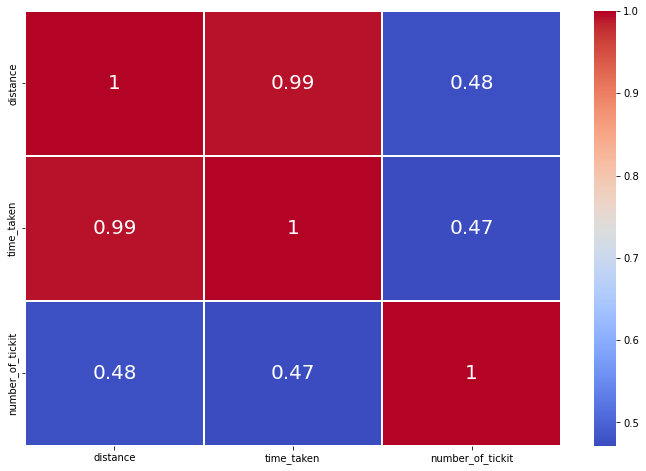

In [ ]:
#Use corr() function to get the correlation and plot the heatmap
correlation = corr_columns.corr()
sns.heatmap(abs(correlation),annot=True,annot_kws={'size':20},cmap ='coolwarm',linewidth=1)
plt.show()


We can see that distance and time_taken column have strong Multicollinearity with each other.
 so we have to do something about it.

we know that Speed = Distance/Time so we will use it and drop distance and time_taken.

In [ ]:
# create speed column.
df_new['speed']= df_new['distance']/df_new['time_taken']

In [ ]:
df_new.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_tickit,date,day_of_week,day_of_year,day_of_month,year_woy,hour,minute,is_weekend,year,quarter,month,distance,time_taken,speed
0,1442,17-10-17,7.250000,Migori,Bus,49,1,2017-10-17 07:15:00,1,290,17,201742,7,15,0,2017,4,10,370.0,428,0.864486
1,5437,19-11-17,7.200000,Migori,Bus,49,1,2017-11-19 07:12:00,6,323,19,201746,7,12,1,2017,4,11,370.0,428,0.864486
2,5710,26-11-17,7.083333,Keroka,Bus,49,1,2017-11-26 07:05:00,6,330,26,201747,7,5,1,2017,4,11,280.0,300,0.933333
3,5777,27-11-17,7.166667,Homa Bay,Bus,49,5,2017-11-27 07:10:00,0,331,27,201748,7,10,0,2017,4,11,360.0,420,0.857143
4,5778,27-11-17,7.200000,Migori,Bus,49,31,2017-11-27 07:12:00,0,331,27,201748,7,12,0,2017,4,11,370.0,428,0.864486


In [ ]:
# Extracting only numerical features from the given dataset
num_col = df_new.describe().columns.values
num_col

array(['travel_time', 'number_of_tickit', 'day_of_week', 'day_of_year',
       'day_of_month', 'hour', 'minute', 'is_weekend', 'year', 'quarter',
       'month', 'distance', 'time_taken', 'speed'], dtype=object)

In [ ]:
#categorical features
cat_col=df_new.describe(include="object").columns.values
cat_col

array(['ride_id', 'travel_date', 'travel_from', 'car_type',
       'max_capacity', 'year_woy'], dtype=object)

In [ ]:
#Importing variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [ ]:
#define a function for calculating vif

def calc_vif(W):
  #Calculating VIF
  vif = pd.DataFrame()
  vif["variables"] = W.columns
  vif["VIF"] = [variance_inflation_factor(W.values, i) for i in range(W.shape[1])]

  return(vif)

In [ ]:
#check Variance Inflation Factor(VIF)
calc_vif(df_new[[i for i in num_col]])

,variables,VIF
0,travel_time,inf
1,number_of_tickit,2.737409e+00
2,day_of_week,5.764468e+00
3,day_of_year,5.404369e+04
4,day_of_month,4.573344e+02
5,hour,inf
6,minute,inf
7,is_weekend,2.025671e+00
8,year,1.524983e+05
9,quarter,1.188470e+02


In [ ]:
calc_vif(df_new[[i for i in num_col if i not in ['minute']]])

,variables,VIF
0,travel_time,1059.784830
1,number_of_tickit,2.737409
2,day_of_week,5.764468
3,day_of_year,54043.693000
4,day_of_month,457.334391
5,hour,995.582980
6,is_weekend,2.025671
7,year,152498.338064
8,quarter,118.847011
9,month,59507.674077


In [ ]:
#Let's remove the features which are having the high value of VIF
calc_vif(df_new[[i for i in num_col if i not in ['minute','time_taken','year','quarter','day_of_year','distance','travel_time']]])

,variables,VIF
0,number_of_tickit,1.996008
1,day_of_week,5.675153
2,day_of_month,4.081674
3,hour,8.737969
4,is_weekend,2.012783
5,month,2.359479
6,speed,15.781483


# **Encoding Categorical features**

In [ ]:
# coverting categorical features into Numerical.
df_new = pd.get_dummies(df_new, columns=['travel_from','car_type'], drop_first=True)

In [ ]:
df_new.head()

,ride_id,travel_date,travel_time,max_capacity,number_of_tickit,date,day_of_week,day_of_year,day_of_month,year_woy,hour,minute,is_weekend,year,quarter,month,distance,time_taken,speed,travel_from_Homa Bay,travel_from_Kehancha,travel_from_Kendu Bay,travel_from_Keroka,travel_from_Keumbu,travel_from_Kijauri,travel_from_Kisii,travel_from_Mbita,travel_from_Migori,travel_from_Ndhiwa,travel_from_Nyachenge,travel_from_Oyugis,travel_from_Rodi,travel_from_Rongo,travel_from_Sirare,travel_from_Sori,car_type_shuttle
0,1442,17-10-17,7.250000,49,1,2017-10-17 07:15:00,1,290,17,201742,7,15,0,2017,4,10,370.0,428,0.864486,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,5437,19-11-17,7.200000,49,1,2017-11-19 07:12:00,6,323,19,201746,7,12,1,2017,4,11,370.0,428,0.864486,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,5710,26-11-17,7.083333,49,1,2017-11-26 07:05:00,6,330,26,201747,7,5,1,2017,4,11,280.0,300,0.933333,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5777,27-11-17,7.166667,49,5,2017-11-27 07:10:00,0,331,27,201748,7,10,0,2017,4,11,360.0,420,0.857143,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5778,27-11-17,7.200000,49,31,2017-11-27 07:12:00,0,331,27,201748,7,12,0,2017,4,11,370.0,428,0.864486,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
#Create a copy of data which will be our final dataset for modelling
data = df_new.copy()
data.columns

Index(['ride_id', 'travel_date', 'travel_time', 'max_capacity',
       'number_of_tickit', 'date', 'day_of_week', 'day_of_year',
       'day_of_month', 'year_woy', 'hour', 'minute', 'is_weekend', 'year',
       'quarter', 'month', 'distance', 'time_taken', 'speed',
       'travel_from_Homa Bay', 'travel_from_Kehancha', 'travel_from_Kendu Bay',
       'travel_from_Keroka', 'travel_from_Keumbu', 'travel_from_Kijauri',
       'travel_from_Kisii', 'travel_from_Mbita', 'travel_from_Migori',
       'travel_from_Ndhiwa', 'travel_from_Nyachenge', 'travel_from_Oyugis',
       'travel_from_Rodi', 'travel_from_Rongo', 'travel_from_Sirare',
       'travel_from_Sori', 'car_type_shuttle'],
      dtype='object')

In [ ]:
#Check the null values in final data
data.isnull().sum()

ride_id                  0
travel_date              0
travel_time              0
max_capacity             0
number_of_tickit         0
date                     0
day_of_week              0
day_of_year              0
day_of_month             0
year_woy                 0
hour                     0
minute                   0
is_weekend               0
year                     0
quarter                  0
month                    0
distance                 0
time_taken               0
speed                    0
travel_from_Homa Bay     0
travel_from_Kehancha     0
travel_from_Kendu Bay    0
travel_from_Keroka       0
travel_from_Keumbu       0
travel_from_Kijauri      0
travel_from_Kisii        0
travel_from_Mbita        0
travel_from_Migori       0
travel_from_Ndhiwa       0
travel_from_Nyachenge    0
travel_from_Oyugis       0
travel_from_Rodi         0
travel_from_Rongo        0
travel_from_Sirare       0
travel_from_Sori         0
car_type_shuttle         0
dtype: int64

In [ ]:
unnecessary_cols = ['ride_id','travel_date', 'travel_time','distance','number_of_tickit','time_taken','year_woy','max_capacity','date']


# **Training the Models**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
import math

In [ ]:
#independent and dependent features
from scipy.stats import zscore
X= data.drop(unnecessary_cols, axis='columns').apply(zscore)
Y= data['number_of_tickit']

In [ ]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.25, random_state=50)

# **Implimenting Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

#Call the model
model = LinearRegression()

# fitting linear model
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
#prediction
y_pred_train = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [ ]:
#r2 score and adjusted r2 score

r2_score_test = r2_score(y_test,y_test_pred)
print('r2_score:',r2_score_test)

adj_r2=1-(1-r2_score(y_test, y_test_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print('Adjusted r2_score :',adj_r2)

r2_score: 0.41636462064428015
Adjusted r2_score : 0.4060987214634303


In [ ]:
# Model score on Train and Test
train_model_lr = model.score(X_train,y_train)
print('Training Accuracy:',train_model_lr)

test_model_lr = model.score(X_test,y_test)
print('Testing Accuracy:',test_model_lr)

Training Accuracy: 0.36990030648153616
Testing Accuracy: 0.41636462064428015


In [ ]:
#define a function which print the result of Evaluation metrics.
def print_metrics(actual, predicted):
  print('MSE is {}'.format(mean_squared_error(actual, predicted)))
  print('RMSE is {}'.format(math.sqrt(mean_squared_error(actual, predicted))))
  print('r2_score is {}'.format(r2_score(actual, predicted)))
  print('MAE is {}'.format(mean_absolute_error(actual, predicted)))
  print('MAPE is {}'.format(np.mean(np.abs((actual - predicted) / actual)) * 100))

In [ ]:

# Test dataset metrics
print_metrics(y_test, y_test_pred)

MSE is 43.97416788936103
RMSE is 6.631302126231396
r2_score is 0.41636462064428015
MAE is 4.564501233326773
MAPE is 152.08763342988559


We can see our model performence is not so good, Lets try some other models.

# **Implementing Lasso Regression** 

In [ ]:
from sklearn.linear_model import Lasso


In [ ]:
#Model Fitting
lasso = Lasso(alpha=0.01 , max_iter= 1500 )
lasso.fit(X_train, y_train)

Lasso(alpha=0.01, max_iter=1500)

In [ ]:
#Model Prediction
y_pred_train = lasso.predict(X_train)
y_test2_pred = lasso.predict(X_test)

In [ ]:
#r2 score and adjusted r2 score
r2_score_test = r2_score(y_test,y_test2_pred)
print('r2_score:',r2_score_test)

adj_r2=1-(1-r2_score(y_test, y_test2_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print('Adjusted r2_score :',adj_r2)

r2_score: 0.4156253405032747
Adjusted r2_score : 0.40534643769779477


In [ ]:
# Model score on Train and Test
train_model_llr = model.score(X_train,y_train)
print('Training Accuracy:',train_model_llr)

test_model_llr = model.score(X_test,y_test)
print('Testing Accuracy:',test_model_llr)

Training Accuracy: 0.36990030648153616
Testing Accuracy: 0.41636462064428015


In [ ]:
#Test dataset evaluation matrics
print_metrics(y_test, y_test2_pred)

MSE is 44.02986915454775
RMSE is 6.635500670977869
r2_score is 0.4156253405032747
MAE is 4.565474645468441
MAPE is 152.51009888923684


# **Cross Validation for Lasso Regression**

In [ ]:
#Import the GridSearchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
# Cross validation and hyperparameter tuning
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,0.05,1,2,3,4,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 0.05, 1, 2, 3, 4, 5, 10,
                                   20, 30, 40, 45, 50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
#Find out the best fitted alpha value
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -47.56570640538437


In [ ]:
y_pred_lasso2 = lasso_regressor.predict(X_test)

In [ ]:
#Printing the evaluation matrix
print_metrics(y_test,y_pred_lasso2)

MSE is 44.02986915454775
RMSE is 6.635500670977869
r2_score is 0.4156253405032747
MAE is 4.565474645468441
MAPE is 152.51009888923684


In [ ]:
# Model score on Train and Test
train_model_lrh = model.score(X_train,y_train)
print('Training Accuracy:',train_model_lrh)

test_model_lrh = model.score(X_test,y_test)
print('Testing Accuracy:',test_model_lrh)

Training Accuracy: 0.36990030648153616
Testing Accuracy: 0.41636462064428015


In [ ]:
#GEt the r2 and adjusted r2 score
r2_score_test = r2_score(y_test,y_pred_lasso2)
print('r2_score:',r2_score_test)

adj_r2=1-(1-r2_score(y_test, y_pred_lasso2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print('Adjusted r2_score :',adj_r2)


r2_score: 0.4156253405032747
Adjusted r2_score : 0.40534643769779477


# **Implementing Ridge Regression**

In [ ]:
#Importing the Ridge and GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

Let's take alpha = 1

In [ ]:
#Model fitting
ridge = Ridge(alpha =1, max_iter= 1500)
ridge.fit(X_train, y_train)

Ridge(alpha=1, max_iter=1500)

In [ ]:
#Model Prediction
y_pred_train = ridge.predict(X_train)
y_pred_ridge = ridge.predict(X_test)

In [ ]:
 #Model score on Train and Test
train_model_rr = model.score(X_train,y_train)
print('Training Accuracy:',train_model_rr)

test_model_rr = model.score(X_test,y_test)
print('Testing Accuracy:',test_model_rr)

print_metrics(y_test, y_pred_ridge)

r2 = r2_score(y_test, y_pred_ridge)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Training Accuracy: 0.36990030648153616
Testing Accuracy: 0.41636462064428015
MSE is 43.974752706927376
RMSE is 6.63134622131339
r2_score is 0.41635685880958107
MAE is 4.5622439591452
MAPE is 152.14414210155226
R2 : 0.41635685880958107
Adjusted R2 :  0.4060908231013456


In [ ]:
# Cross Validation and Hyperprarameter tuning
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,2,3,4,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 2, 3, 4, 5, 10, 20, 30, 40, 45, 50,
                                   55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
#Get the best fitted alpha value
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 60}

Using  {'alpha': 60}  the negative mean squared error is:  -47.5620487987966


In [ ]:
#Model Prediction
y_pred_ridge2 = ridge_regressor.predict(X_test)

In [ ]:
print_metrics(y_test,y_pred_ridge2)

MSE is 44.00403687719265
RMSE is 6.633553864799218
r2_score is 0.41596819249382744
MAE is 4.564476260642539
MAPE is 152.63486842736245


In [ ]:
# Model score on Train and Test
train_model_rrh = model.score(X_train,y_train)
print('Training Accuracy:',train_model_rrh)

test_model_rrh = model.score(X_test,y_test)
print('Testing Accuracy:',test_model_rrh)

Training Accuracy: 0.36990030648153616
Testing Accuracy: 0.41636462064428015


In [ ]:
r2 = r2_score(y_test, y_pred_ridge2)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred_ridge2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.41596819249382744
Adjusted R2 :  0.4056953203096797


# **Implementing Elastic net Regression**

In [ ]:
#Import ElasticNet model from sklearn
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.01, l1_ratio=0.5)

In [ ]:
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.01)

In [ ]:
#Model Score
elasticnet.score(X_train, y_train)

0.3696577039389728

In [ ]:
y_pred_en = elasticnet.predict(X_test)

In [ ]:
# Model score on Train and Test
train_model_en = model.score(X_train,y_train)
print('Training Accuracy:',train_model_en)

test_model_en = model.score(X_test,y_test)
print('Testing Accuracy:',test_model_en)

Training Accuracy: 0.36990030648153616
Testing Accuracy: 0.41636462064428015


In [ ]:
#Evaluation metrics
print_metrics(y_test,y_pred_en)

MSE is 44.0162420582555
RMSE is 6.634473758954473
r2_score is 0.4158062024932969
MAE is 4.564818435975187
MAPE is 152.52777653699016


In [ ]:
#r2 score and adjusted r2 score
r2 = r2_score(y_test, y_pred_en)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.4158062024932969
Adjusted R2 :  0.405530480973635


# **Grid Search Cross Validation for Elastic Net Regression**

In [ ]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,2,3,4,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 2, 3, 4, 5, 10, 20, 30,
                                   40, 45, 50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [ ]:
y_pred_elastic = elastic_regressor.predict(X_test)

In [ ]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01, 'l1_ratio': 0.7}

Using  {'alpha': 0.01, 'l1_ratio': 0.7}  the negative mean squared error is:  -47.62027678858558


In [ ]:
#Evaluation metrics
print_metrics(y_test,y_pred_elastic)

MSE is 44.0213986902008
RMSE is 6.634862371609588
r2_score is 0.4157377624753037
MAE is 4.565094326131986
MAPE is 152.52537709390523


In [ ]:
# Model score on Train and Test
train_model_en = model.score(X_train,y_train)
print('Training Accuracy:',train_model_en)

test_model_en = model.score(X_test,y_test)
print('Testing Accuracy:',test_model_en)

Training Accuracy: 0.36990030648153616
Testing Accuracy: 0.41636462064428015


In [ ]:
#r2 score and adjusted r2 score
r2 = r2_score(y_test, y_pred_elastic)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred_elastic))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.4157377624753037
Adjusted R2 :  0.4054608371247064


# **Decision Tree**

In [ ]:
#Importing DecisionTreeRegressor from sklearn
from sklearn.tree import DecisionTreeRegressor

In [ ]:
#Copy of the data
decision_tree_data = data.copy()

In [ ]:
# multicollinearity does not affect Tree based model so we will include distance and time taken.
unnecessary_cols = ['ride_id','travel_date', 'travel_time','number_of_tickit','date']


In [ ]:
# creating dependent and independant variable.
X= decision_tree_data.drop(unnecessary_cols, axis='columns')
Y= decision_tree_data['number_of_tickit']

In [ ]:
#train and test split
X_train , X_test, y_train, y_test = train_test_split(X,Y, test_size= 0.3, random_state=0 )

In [ ]:

# fitting decision tree model
tree_model = DecisionTreeRegressor(criterion='squared_error', max_leaf_nodes=30,max_depth= 30,random_state=0)
dtree =tree_model.fit(X_train, y_train)

In [ ]:
y_dt_pred = tree_model.predict(X_test)

In [ ]:
# Model score on Train and Test
train_model_dt = tree_model.score(X_train,y_train)
print('Training Accuracy:',train_model_dt)

test_model_dt = tree_model.score(X_test,y_test)
print('Testing Accuracy:',test_model_dt)

Training Accuracy: 0.6059729180915384
Testing Accuracy: 0.5750416596043273


In [ ]:
#GEt r2 score and adjusted r2 score
r2_score_test = r2_score(y_test,y_dt_pred)
print('r2_score:',r2_score_test)

adj_r2=1-(1-r2_score(y_test, y_dt_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print('Adjusted r2_score :',adj_r2)

r2_score: 0.5750416596043273
Adjusted r2_score : 0.5678936896899128


In [ ]:
#Printing the Evaluation Matrix
print_metrics(y_test,y_dt_pred)

MSE is 32.085280920184985
RMSE is 5.66438707365457
r2_score is 0.5750416596043273
MAE is 3.9135985223843623
MAPE is 136.78111699272947


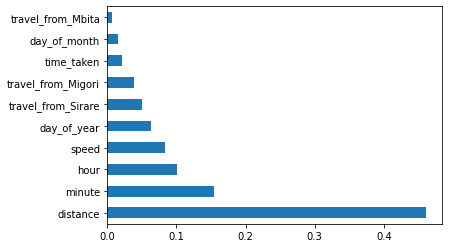

In [ ]:
#Important Features for Decision Tree
%matplotlib inline
feature_importances = pd.Series(tree_model.feature_importances_,index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.show()

We can see we are not getting good score so far, Lets try Ensemble methods

# **Random Forest Regressor**

In [ ]:
#Importing the RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
#Copy of the data
random_forest_data = data.copy()

# multicollinearity does not affect Tree based model so we will include distance and time taken
unnecessary_cols = ['ride_id','travel_date', 'travel_time','number_of_tickit','date']

In [ ]:
X = random_forest_data.drop(unnecessary_cols, axis='columns')
Y= random_forest_data['number_of_tickit']

In [ ]:
#train and test split
X_train , X_test, y_train, y_test = train_test_split(X,Y, test_size= 0.3, random_state=0 )

In [ ]:
random_reg = RandomForestRegressor()

In [ ]:
#Fitting the model
random_reg.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
y_pred_rf = random_reg.predict(X_test)

In [ ]:
# Model score on Train and Test
train_model_rf = random_reg.score(X_train,y_train)
print('Training Accuracy:',train_model_rf)

test_model_rf = random_reg.score(X_test,y_test)
print('Testing Accuracy:',test_model_rf)

Training Accuracy: 0.9538285315564785
Testing Accuracy: 0.6884565084284484


In [ ]:
#Printing the r2 score and adjusted r2 score
r2_score_test = r2_score(y_test,y_pred_rf)
print('r2_score:',r2_score_test)

adj_r2=1-(1-r2_score(y_test, y_pred_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print('Adjusted r2_score :',adj_r2)

r2_score: 0.6884565084284484
Adjusted r2_score : 0.683216221809502


In [ ]:
#Print the Evaluation Matrix
print_metrics(y_test,y_pred_rf)

MSE is 23.522212640000003
RMSE is 4.8499703751672545
r2_score is 0.6884565084284484
MAE is 3.0837706666666667
MAPE is 97.33603620243174


Our model seems to overfit since it does much better on the training set than on the test set i.e training accuracy(=94.8%) is much laarger than testing accuracy(=65.4%), let's do hyperparameter tuning using GridSearchCV, RandomSearchCV.

## **Random forest Regressor using GridSearchCV, RandomSearchCV**

In [ ]:
#Importing RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = [ 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['squared_error','absolute_error','poisson']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['squared_error', 'absolute_error', 'poisson']}


In [ ]:
estimator = RandomForestRegressor()
random = RandomizedSearchCV( estimator=estimator, param_distributions=random_grid, n_iter=3, cv=2, verbose=1,
                               random_state=0 )


In [ ]:
random.fit(X_train,y_train)

Fitting 2 folds for each of 3 candidates, totalling 6 fits


RandomizedSearchCV(cv=2, estimator=RandomForestRegressor(), n_iter=3,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=0, verbose=1)

In [ ]:
random.best_params_

{'n_estimators': 600,
 'min_samples_split': 5,
 'min_samples_leaf': 6,
 'max_features': 'log2',
 'max_depth': 670,
 'criterion': 'squared_error'}

Now lets use GridSearchCV on these best parameters.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
random_grid ={'criterion': ['squared_error'],
 'max_depth':[655,660,670],
 'max_features': ['log2'],
 'min_samples_leaf':[6],
 'min_samples_split': [5],
 'n_estimators': [550,650,600]}

In [ ]:
estimator = RandomForestRegressor()
grid = GridSearchCV( estimator=estimator, param_grid =random_grid, cv=2, verbose=1
                               ,n_jobs=-1 )

In [ ]:
#Fitting the model
grid.fit(X,Y)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


GridSearchCV(cv=2, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error'],
                         'max_depth': [655, 660, 670], 'max_features': ['log2'],
                         'min_samples_leaf': [6], 'min_samples_split': [5],
                         'n_estimators': [550, 650, 600]},
             verbose=1)

In [ ]:
grid.best_params_

{'criterion': 'squared_error',
 'max_depth': 670,
 'max_features': 'log2',
 'min_samples_leaf': 6,
 'min_samples_split': 5,
 'n_estimators': 600}

In [ ]:
y_pred_gc = grid.predict(X_test)

In [ ]:
# Model score on Train and Test
train_model_gc = grid.score(X_train,y_train)
print('Training Accuracy:',train_model_gc)

test_model_gc = grid.score(X_test,y_test)
print('Testing Accuracy:',test_model_gc)

Training Accuracy: 0.6721658479293641
Testing Accuracy: 0.6974815791220177


In [ ]:
#r2 and adjusted r2 score
r2_score_test = r2_score(y_test,y_pred_gc)
print('r2_score:',r2_score_test)

adj_r2=1-(1-r2_score(y_test, y_pred_gc))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print('Adjusted r2_score :',adj_r2)

r2_score: 0.6974815791220177
Adjusted r2_score : 0.6923930978158769


In [ ]:
#Printing the Evaluation Matrix
print_metrics(y_test,y_pred_gc)

MSE is 22.84080013199254
RMSE is 4.779204968610631
r2_score is 0.6974815791220177
MAE is 3.22732376163234
MAPE is 108.32225543210686


## **Random Forest Important Features**

In [ ]:
#array of important features
importance = grid.best_estimator_.feature_importances_
importance

array([0.00817392, 0.0213356 , 0.05904396, 0.03597161, 0.04695935,
       0.07978528, 0.13491885, 0.003384  , 0.00365279, 0.00857475,
       0.02203742, 0.13661402, 0.13266417, 0.1488612 , 0.02208165,
       0.005153  , 0.        , 0.00521987, 0.00025096, 0.01678708,
       0.01070459, 0.00174437, 0.0311368 , 0.00051499, 0.00610104,
       0.        , 0.00165589, 0.00650079, 0.03929636, 0.00227616,
       0.00859953])

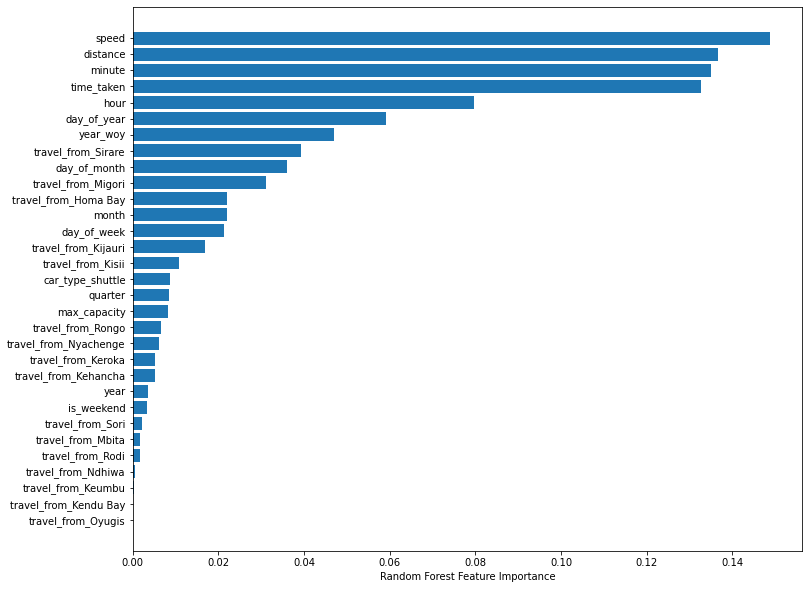

In [ ]:
# plotting important features using Xgboost in built function.
plt.figure(figsize=(12,10))
sorted_idx = grid.best_estimator_.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx],importance[sorted_idx])
plt.xlabel('Random Forest Feature Importance')
plt.show()

# **XGboost**

In [ ]:
#Importing xgb form xgboost
import xgboost as xgb

In [ ]:
# multicollinearity does not affect Tree based model so we will include distance and time taken
notrqrd_cols = ['ride_id','travel_date','year_woy','max_capacity','travel_time','number_of_tickit','date']

In [ ]:
xgboost_data = data.copy()

In [ ]:
X = xgboost_data.drop(notrqrd_cols, axis=1)
Y = xgboost_data['number_of_tickit']

#train and test split
X_train , X_test, y_train, y_test = train_test_split(X,Y, test_size= 0.3, random_state=0 )


In [ ]:
#Model fitting
xgb_reg = xgb.XGBRegressor(
                        booster= 'gbtree',
                        eta= 0.004,
                        learning_rate= 0.1,
                        max_depth= 7,
                        min_child_weight= 10,
                        n_jobs= 1,
                        objective= 'reg:linear',
                        random_state= 0,
                        scale_pos_weight= 1,
                        verbosity= 1)

xgb_reg.fit(X_train,y_train)

[13:54:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(eta=0.004, max_depth=7, min_child_weight=10)

In [ ]:
y_pred_xgb = xgb_reg.predict(X_test)

In [ ]:
# Model score on Train and Test
train_model_xgb = xgb_reg.score(X_train,y_train)
print('Training Accuracy:',train_model_xgb)

test_model_xgb = xgb_reg.score(X_test,y_test)
print('Testing Accuracy:',test_model_xgb)

Training Accuracy: 0.8017639827082408
Testing Accuracy: 0.6840884180370206


In [ ]:
#r2 and adjusted r2 score
r2_score_test = r2_score(y_test,y_pred_xgb)
print('r2_score:',r2_score_test)

adj_r2=1-(1-r2_score(y_test, y_pred_xgb))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print('Adjusted r2_score :',adj_r2)

r2_score: 0.6840884180370206
Adjusted r2_score : 0.6791228701362475


In [ ]:
#Evaluation Matrix
print_metrics(y_test,y_pred_xgb)

MSE is 23.852012985048482
RMSE is 4.883852268962328
r2_score is 0.6840884180370206
MAE is 3.2528212715148928
MAPE is 104.94893980649078


Our XGboost model seem to over fit lets use GridSearchCV to try multiple Parameters.

# XGboost using GridSearchCV

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [ ]:
xgb = xgb.XGBRegressor()

In [ ]:
params = {"min_child_weight":[9,10,11], 
          'eta': [0.05,0.06,0.07],
          'eval_metric':['rmse'], 
          'colsample_bytree':[0.6],
          'max_depth': [8,9,10],
          }

In [ ]:
xgb_grid = GridSearchCV(xgb,param_grid=params, verbose=1,cv=5)
xgb_grid.fit(X, Y)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[13:54:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:54:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:54:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:54:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:54:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:54:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:54:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:54:31] WARNING: /workspace/src/objective/regr

GridSearchCV(cv=5, estimator=XGBRegressor(),
             param_grid={'colsample_bytree': [0.6], 'eta': [0.05, 0.06, 0.07],
                         'eval_metric': ['rmse'], 'max_depth': [8, 9, 10],
                         'min_child_weight': [9, 10, 11]},
             verbose=1)

In [ ]:
xgb_grid.best_params_

{'colsample_bytree': 0.6,
 'eta': 0.05,
 'eval_metric': 'rmse',
 'max_depth': 8,
 'min_child_weight': 9}

In [ ]:
xgb_grid.best_estimator_.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.6,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 8,
 'min_child_weight': 9,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'reg:linear',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1,
 'eta': 0.05,
 'eval_metric': 'rmse'}

In [ ]:
y_pred_gxgb = xgb_grid.predict(X_test)

In [ ]:
# Model score on Train and Test
train_model_gxgb = xgb_grid.score(X_train,y_train)
print('Training Accuracy:',train_model_gxgb)

test_model_gxgb = xgb_grid.score(X_test,y_test)
print('Testing Accuracy:',test_model_gxgb)

Training Accuracy: 0.813007688371788
Testing Accuracy: 0.8263041714449371


In [ ]:
#r2 and adjusted r2 score
r2_score_test = r2_score(y_test,y_pred_gxgb)
print('r2_score:',r2_score_test)

adj_r2=1-(1-r2_score(y_test, y_pred_gxgb))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print('Adjusted r2_score :',adj_r2)

r2_score: 0.8263041714449371
Adjusted r2_score : 0.8235739931099252


In [ ]:
# Test dataset Matrics
print_metrics(y_test,y_pred_gxgb)

MSE is 13.11441363561536
RMSE is 3.621382834721477
r2_score is 0.8263041714449371
MAE is 2.4583560650825502
MAPE is 78.23542586822386


## **Important Features**

In [ ]:
# arry of important features
importance = xgb_grid.best_estimator_.feature_importances_
importance

array([0.00743688, 0.01687283, 0.0094609 , 0.0289271 , 0.04308175,
       0.01197078, 0.00899217, 0.00900286, 0.02106346, 0.10662672,
       0.10713055, 0.1595198 , 0.07902204, 0.03490724, 0.        ,
       0.0069203 , 0.00016828, 0.01225554, 0.00651707, 0.02320314,
       0.01927938, 0.02478162, 0.06655661, 0.        , 0.00321848,
       0.01827342, 0.13239358, 0.03409951, 0.008318  ], dtype=float32)

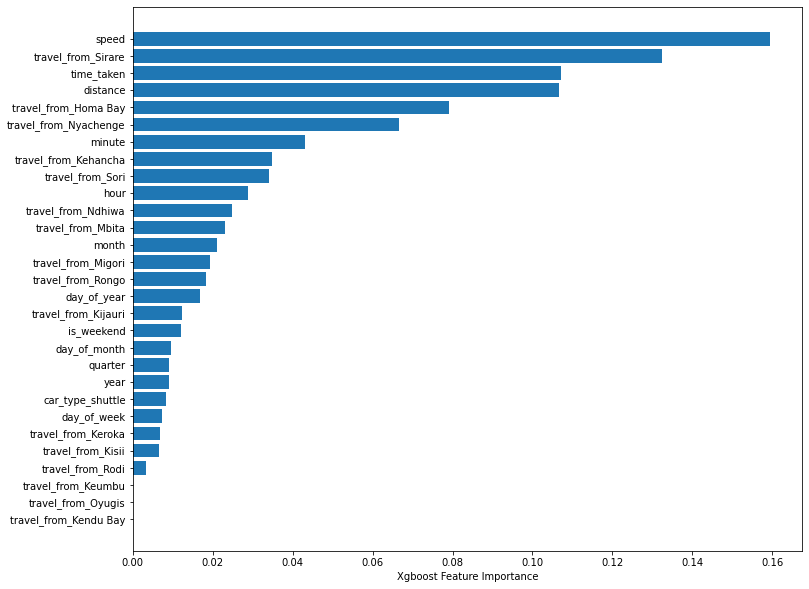

In [ ]:
# plotting important features using Xgboost in built function.
plt.figure(figsize=(12,10))
sorted_idx = xgb_grid.best_estimator_.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx],importance[sorted_idx])
plt.xlabel('Xgboost Feature Importance')
plt.show()

We can see the list of most important features in our data in above barplot.

# **Evaluating all models**

**Lets create dataframe containing the details of all models.**

In [ ]:
#evaluation metrics for all models
Model = ["Linear Regression","Lasso Regression","Ridge Regression","Elastic Net Regression","Decision Tree",'Random Forest','Xgboost']
Train_Accuracy=  [train_model_lr,train_model_lrh, train_model_rrh,train_model_en,train_model_dt, train_model_gc, train_model_gxgb]
Test_Accuracy = [test_model_lr,test_model_lrh, test_model_rrh,test_model_en,test_model_dt, test_model_gc, test_model_gxgb]

In [ ]:
#creating dataframe for all classifiers using dictionary
pd.DataFrame({"Model":Model,"Train Accuracy":Train_Accuracy,'Test Accuracy': Test_Accuracy,
'r2_score':[0.408231,0.407777,0.407028,0.415377,0.575041,0.699679,0.826304],
'Adjusted r2_score':[0.398601,0.398601,0.398601,0.405460,0.567893,0.69462810,0.823573],
'MSE':[51.632482,51.672078,51.737407,44.021398,32.085280,22.671810,13.114413],
'RMSE':[7.185574,7.188329,7.192872,6.634862,5.664387,4.761810,3.621982],
'MAE':[4.866946,4.872014,4.876217,4.550943,3.913598,3.214424,2.458356],
'MAPE':[148.235086,148.608494,148.834105,152.525377,136.78111,107.68877,78.235425]})

,Model,Train Accuracy,Test Accuracy,r2_score,Adjusted r2_score,MSE,RMSE,MAE,MAPE
0,Linear Regression,0.369900,0.416365,0.408231,0.398601,51.632482,7.185574,4.866946,148.235086
1,Lasso Regression,0.369900,0.416365,0.407777,0.398601,51.672078,7.188329,4.872014,148.608494
2,Ridge Regression,0.369900,0.416365,0.407028,0.398601,51.737407,7.192872,4.876217,148.834105
3,Elastic Net Regression,0.369900,0.416365,0.415377,0.405460,44.021398,6.634862,4.550943,152.525377
4,Decision Tree,0.605973,0.575042,0.575041,0.567893,32.085280,5.664387,3.913598,136.781110
5,Random Forest,0.672166,0.697482,0.699679,0.694628,22.671810,4.761810,3.214424,107.688770
6,Xgboost,0.813008,0.826304,0.826304,0.823573,13.114413,3.621982,2.458356,78.235425


# **Observations:**

1)We can see from above table that Xgboost highest Training and Test Accuracy.

2)Xgboost also have best r2 and Adjusted r2 score.

3)It also have minimum MSE,RMSE,MAE and MAPE errors.

4)From above observations we can say that Xgboost is the best Model.

# **CONCLUSIONS**

**1)** **As we have implemented six different models to predict the number of seats that Mobiticket can expect to sell for each ride. Linear Regression, Regularized linear regression (Ridge and Lasso), Decision Tree, Random Forest Regressor and Xgboost Regressor. Xgboost regression model performed the best among them**. 

**2)** **Our Model will help Mobiticket and Bus operators to anticipate the number of tickets they can expect to sell for each ride**.


### THANK YOU!!☺️